 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b><br>
Здравствуй Марат!<br>
Это Николай Шавлюго.<br>
Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях. <br>
После стандартного вступления я постарюсь прокомментировать сделанные тобой шаги в части моделирования.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА</b></u></p>
    <p>КОММЕНТАРИЙ СТУДЕНТА</p>
</div>

# Выбор локации для скважины

## Описание проекта

Горнодобывающая компания «ГлавРосГосНефть» поставила задачу по поиску места для бурения новой скважины. Нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбрать регион с наибольшей средней прибылью.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>С задачей понятно, идём к решению)</p>
</div>

## Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
RANDOM_STATE = 42
BEST = 200 #200 лучших для разработки точек региона
PROFIT = 450 #450 тыс. рублей за 1000 баррелей
BUDGET = 10**7 #бюджет на разработку скважин в регионе 10**7 тыс. рублей
N_ITEMS = 500
N = 1000

## Описание данных

**id** — уникальный идентификатор скважины;<br>
**f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);<br>
**product** — объём запасов в скважине, тыс. баррелей

### Данные геологоразведки региона №0

In [3]:
try:
    geo_data_0 = pd.read_csv('geo_data_0.csv')
except:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
geo_data_0.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


### Данные геологоразведки региона №1

In [4]:
try:
    geo_data_1 = pd.read_csv('geo_data_1.csv')
except:
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
geo_data_1.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


### Данные геологоразведки региона №2

In [5]:
try:
    geo_data_2 = pd.read_csv('geo_data_2.csv')
except:
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
geo_data_2.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ОК, данные на базе)</p>
</div>

## Предобработка данных

### Данные геологоразведки региона №0

In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
len(geo_data_0['id'].unique())

99990

Похоже в датафрейме присутствуют данные по одним и тем же скважинам. Что с ними делать решим после исследовательского анализа данных

In [9]:
geo_data_0['id'].value_counts().head(10)

id
fiKDv    2
QcMuo    2
AGS9W    2
Tdehs    2
74z30    2
A5aEY    2
bsk9y    2
TtcGQ    2
HZww2    2
bxg6G    2
Name: count, dtype: int64

In [10]:
geo_data_0.duplicated().sum()

0

Полные дубли отсутствуют

In [11]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Пропуски отсутствуют

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ок, еесть такое с одинаковыми  названиями.</p>
</div>

### Данные геологоразведки региона №1

In [12]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
len(geo_data_1['id'].unique())

99996

Похоже в датафрейме присутствуют данные по одним и тем же скважинам. Что с ними делать решим после исследовательского анализа данных

In [15]:
geo_data_1['id'].value_counts().head(10)

id
wt4Uk    2
LHZR0    2
5ltQ6    2
bfPNe    2
kBEdx    1
lAVJZ    1
ENYw9    1
gMInh    1
uPzFJ    1
w75gp    1
Name: count, dtype: int64

In [16]:
geo_data_1.duplicated().sum()

0

Полные дубли отсутствуют

In [17]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Пропуски отсутствуют

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ок</p>
</div>

### Данные геологоразведки региона №2

In [18]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [19]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [20]:
len(geo_data_2['id'].unique())

99996

Похоже в датафрейме присутствуют данные по одним и тем же скважинам. Что с ними делать решим после исследовательского анализа данных

In [21]:
geo_data_2['id'].value_counts().head(10)

id
VF7Jo    2
KUPhW    2
xCHr8    2
Vcm5J    2
fwXo0    1
B9hou    1
gtl32    1
V5b65    1
rpqpj    1
Gibob    1
Name: count, dtype: int64

In [22]:
geo_data_2.duplicated().sum()

0

Полные дубли отсутствуют

In [23]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Пропуски отсутствуют

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Первичныый осмотр, первичные выводы, ОК/p>
</div>

## Исследовательский анализ данных

### Данные геологоразведки региона №0

#### Признак f0

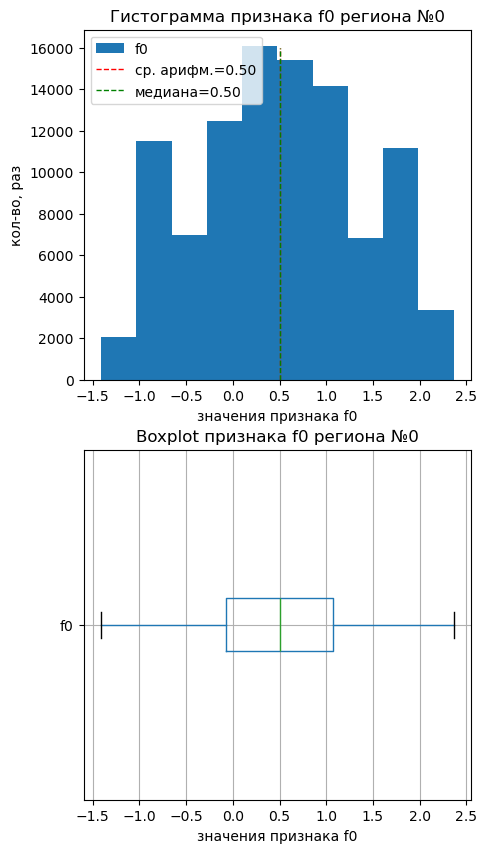

In [24]:
mean = geo_data_0['f0'].mean()
median = geo_data_0['f0'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_0['f0'].plot(kind='hist', title='Гистограмма признака f0 региона №0')
plt.plot([mean, mean], [0, 16000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 16000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f0')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_0.boxplot(column='f0', vert=False)
plt.title('Boxplot признака f0 региона №0')
plt.xlabel('значения признака f0')
plt.show()

**Центр набора данных признака f0 = 0.50**

#### Признак f1

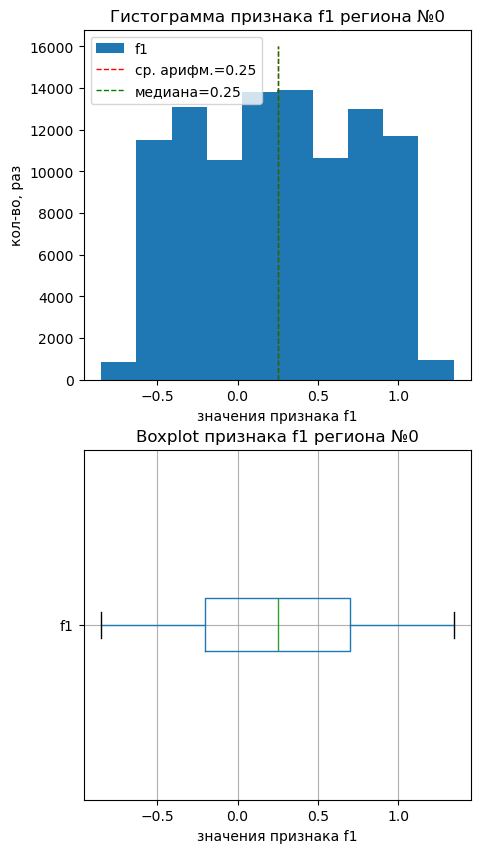

In [25]:
mean = geo_data_0['f1'].mean()
median = geo_data_0['f1'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_0['f1'].plot(kind='hist', title='Гистограмма признака f1 региона №0')
plt.plot([mean, mean], [0, 16000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 16000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f1')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_0.boxplot(column='f1', vert=False)
plt.title('Boxplot признака f1 региона №0')
plt.xlabel('значения признака f1')
plt.show()

**Центр набора данных признака f1 = 0.25**

#### Признак f2

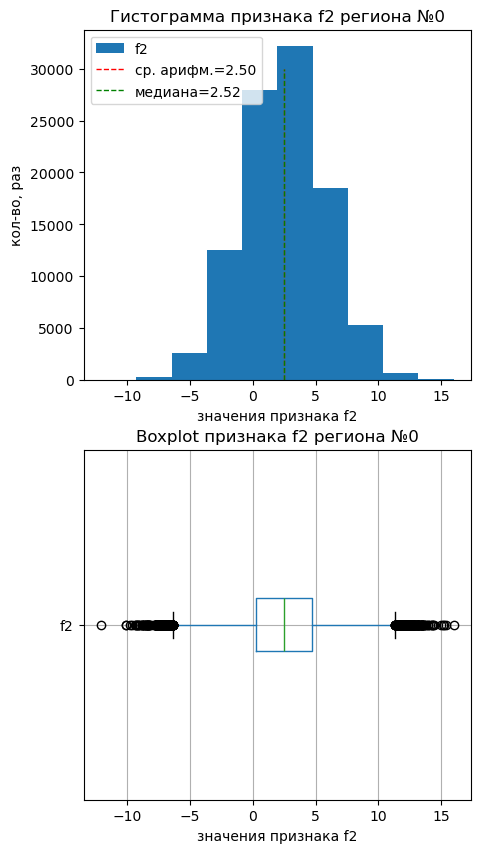

In [26]:
mean = geo_data_0['f2'].mean()
median = geo_data_0['f2'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_0['f2'].plot(kind='hist', title='Гистограмма признака f2 региона №0')
plt.plot([mean, mean], [0, 30000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 30000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f2')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_0.boxplot(column='f2', vert=False)
plt.title('Boxplot признака f2 региона №0')
plt.xlabel('значения признака f2')
plt.show()

**Центр набора данных признака f2 = 2.5**

#### Признак product

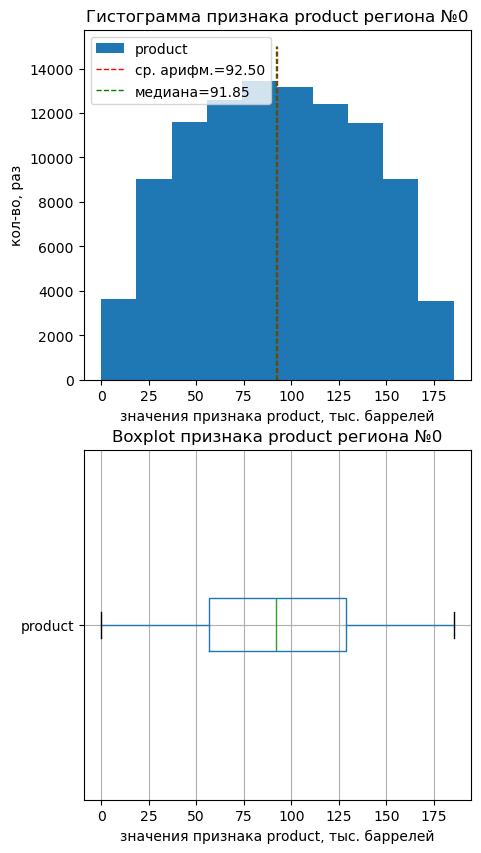

In [27]:
mean = geo_data_0['product'].mean()
median = geo_data_0['product'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_0['product'].plot(kind='hist', title='Гистограмма признака product региона №0')
plt.plot([mean, mean], [0, 15000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 15000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака product, тыс. баррелей')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_0.boxplot(column='product', vert=False)
plt.title('Boxplot признака product региона №0')
plt.xlabel('значения признака product, тыс. баррелей')
plt.show()

**Центр набора данных признака product = 92**

#### Вывод

In [28]:
range_0_f0 = 1.5 * (geo_data_0.describe().loc['75%', 'f0'] - geo_data_0.describe().loc['25%', 'f0'])
range_0_f1 = 1.5 * (geo_data_0.describe().loc['75%', 'f1'] - geo_data_0.describe().loc['25%', 'f1'])
range_0_f2 = 1.5 * (geo_data_0.describe().loc['75%', 'f2'] - geo_data_0.describe().loc['25%', 'f2'])
range_0_product = 1.5 * (geo_data_0.describe().loc['75%', 'product'] - geo_data_0.describe().loc['25%', 'product'])

pd.DataFrame(
    [
        [
            geo_data_0['f0'].min(),
            0.50,
            geo_data_0['f0'].max(),
        ],
        [
            geo_data_0['f1'].min(),
            0.25,
            geo_data_0['f1'].max(),
        ],
        [
            geo_data_0.describe().loc['25%', 'f2'] - range_0_f2,
            2.5,
            geo_data_0.describe().loc['75%', 'f2'] + range_0_f2,    
        ],
        [
            geo_data_0['product'].min(),
            92,
            geo_data_0['product'].max(), 
        ]
    ],
    columns=['мин. знач., не явл. выбросом', 'центр набора данных', 'макс. знач., не явл. выбросом'],
    index=['f0', 'f1', 'f2', 'product']
)

,"мин. знач., не явл. выбросом",центр набора данных,"макс. знач., не явл. выбросом"
f0,-1.408605,0.50,2.362331
f1,-0.848218,0.25,1.343769
f2,-6.353261,2.50,11.356098
product,0.000000,92.00,185.364347


In [29]:
geo_data_0[
        geo_data_0['id'].isin(
            geo_data_0['id'].value_counts().head(10).index
        )
]

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


Показатели дублирующихся данных не являются выбросами, поэтому нельзя сказать какие данные верные, а какие ошибочные, поэтому с учетом размера выборки (100000) проще эти данные удалить 

In [30]:
geo_data_0['id'].value_counts().head(10).index

Index(['fiKDv', 'QcMuo', 'AGS9W', 'Tdehs', '74z30', 'A5aEY', 'bsk9y', 'TtcGQ',
       'HZww2', 'bxg6G'],
      dtype='object', name='id')

In [31]:
geo_data_0 = geo_data_0.drop(
    geo_data_0[
        geo_data_0['id'].isin(
            geo_data_0['id'].value_counts().head(10).index
        )
    ].index
)

In [32]:
geo_data_0.shape

(99980, 5)

In [33]:
len(geo_data_0['id'].unique())

99980

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>при этом одинаковые скважины по остальным параметрам разные. Т.е. можно предположить, что это и не дубли) НО, ок, идём дальше.</p>
</div>

### Данные геологоразведки региона №1

#### Признак f0

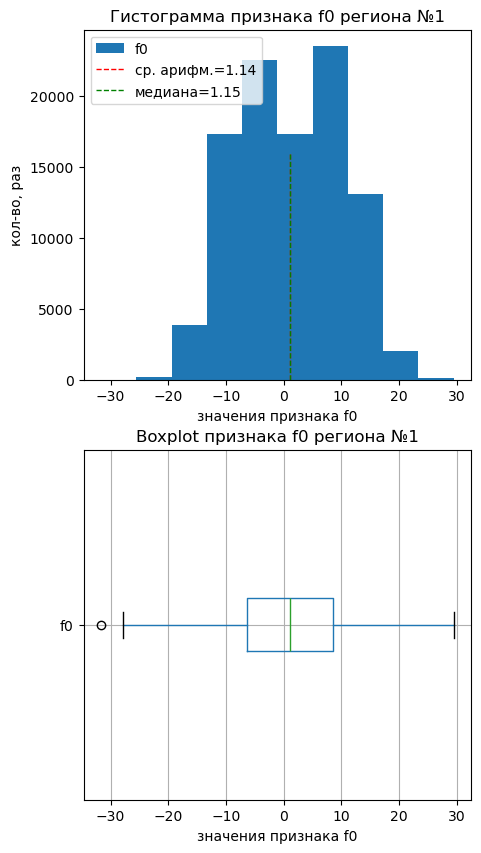

In [34]:
mean = geo_data_1['f0'].mean()
median = geo_data_1['f0'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_1['f0'].plot(kind='hist', title='Гистограмма признака f0 региона №1')
plt.plot([mean, mean], [0, 16000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 16000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f0')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_1.boxplot(column='f0', vert=False)
plt.title('Boxplot признака f0 региона №1')
plt.xlabel('значения признака f0')
plt.show()

**Центр набора данных признака f0 = 1.14**

#### Признак f1

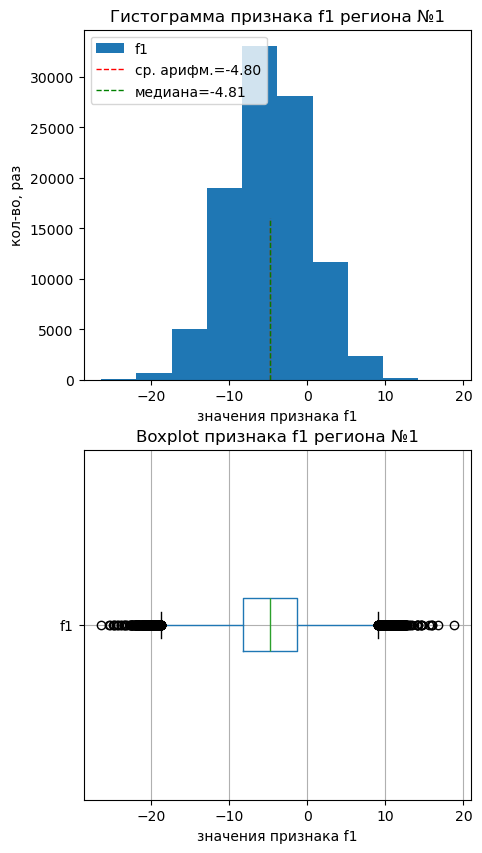

In [35]:
mean = geo_data_1['f1'].mean()
median = geo_data_1['f1'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_1['f1'].plot(kind='hist', title='Гистограмма признака f1 региона №1')
plt.plot([mean, mean], [0, 16000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 16000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f1')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_1.boxplot(column='f1', vert=False)
plt.title('Boxplot признака f1 региона №1')
plt.xlabel('значения признака f1')
plt.show()

**Центр набора данных признака f1 = 4.8**

#### Признак f2

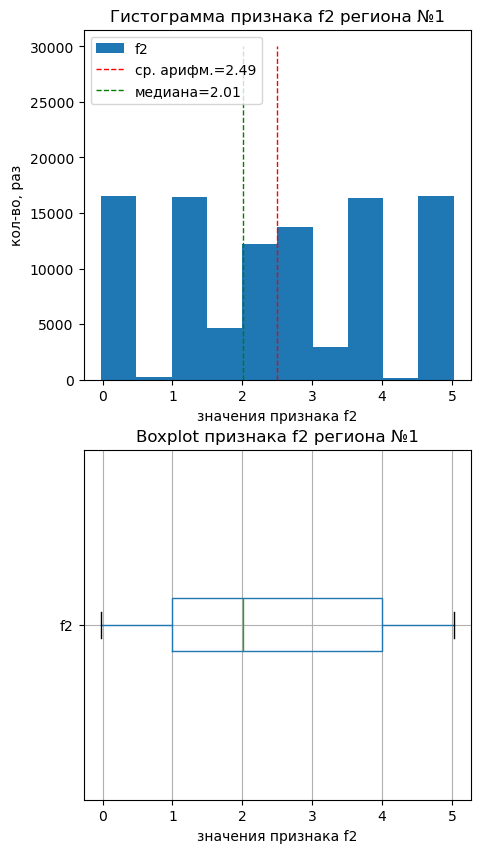

In [36]:
mean = geo_data_1['f2'].mean()
median = geo_data_1['f2'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_1['f2'].plot(kind='hist', title='Гистограмма признака f2 региона №1')
plt.plot([mean, mean], [0, 30000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 30000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f2')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_1.boxplot(column='f2', vert=False)
plt.title('Boxplot признака f2 региона №1')
plt.xlabel('значения признака f2')
plt.show()

**Центр набора данных признака f2 = 2.5** (лучше выбрать среднее арифметическое, так как на гистограмме множество пиков)

#### Признак product

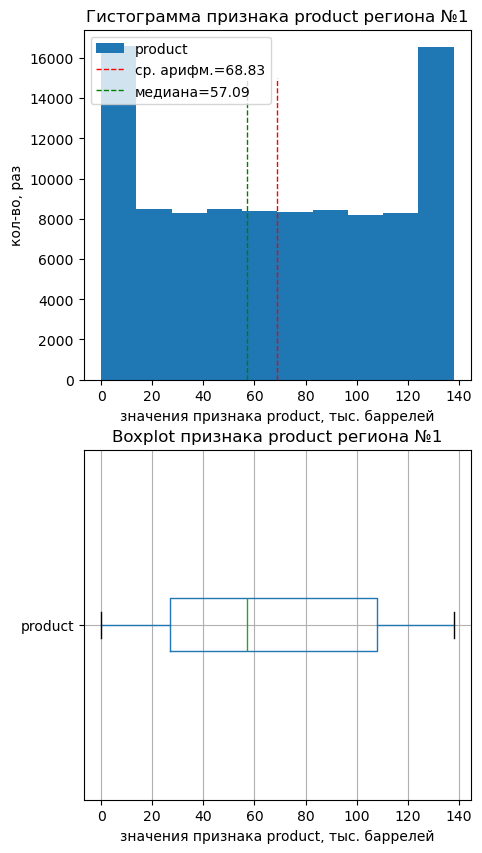

In [37]:
mean = geo_data_1['product'].mean()
median = geo_data_1['product'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_1['product'].plot(kind='hist', title='Гистограмма признака product региона №1')
plt.plot([mean, mean], [0, 15000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 15000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака product, тыс. баррелей')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_1.boxplot(column='product', vert=False)
plt.title('Boxplot признака product региона №1')
plt.xlabel('значения признака product, тыс. баррелей')
plt.show()

**Центр набора данных признака product = 57** (лучше выбрать медиану, так как пики вытянут среднее)

#### Вывод

In [38]:
range_1_f0 = 1.5 * (geo_data_1.describe().loc['75%', 'f0'] - geo_data_1.describe().loc['25%', 'f0'])
range_1_f1 = 1.5 * (geo_data_1.describe().loc['75%', 'f1'] - geo_data_1.describe().loc['25%', 'f1'])
range_1_f2 = 1.5 * (geo_data_1.describe().loc['75%', 'f2'] - geo_data_1.describe().loc['25%', 'f2'])
range_1_product = 1.5 * (geo_data_1.describe().loc['75%', 'product'] - geo_data_1.describe().loc['25%', 'product'])

pd.DataFrame(
    [
        [
            geo_data_1.describe().loc['25%', 'f0'] - range_1_f0,
            1.14,
            geo_data_1['f0'].max(),
        ],
        [
            geo_data_1.describe().loc['25%', 'f1'] - range_1_f1,
            4.8,
            geo_data_1.describe().loc['75%', 'f1'] + range_1_f1,    
        ],
        [
            geo_data_1['f2'].min(),
            2.49,
            geo_data_1['f2'].max(),
        ],
        [
            geo_data_1['product'].min(),
            57,
            geo_data_1['product'].max(), 
        ]
    ],
    columns=['мин. знач., не явл. выбросом', 'центр набора данных', 'макс. знач., не явл. выбросом'],
    index=['f0', 'f1', 'f2', 'product']
)

,"мин. знач., не явл. выбросом",центр набора данных,"макс. знач., не явл. выбросом"
f0,-28.677901,1.14,29.421755
f1,-18.670738,4.80,9.069937
f2,-0.018144,2.49,5.019721
product,0.000000,57.00,137.945408


In [39]:
geo_data_1[
        geo_data_1['id'].isin(
            geo_data_1['id'].value_counts().head(4).index
        )
]

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


Показатели дублирующихся данных не являются выбросами, поэтому нельзя сказать какие данные верные, а какие ошибочные, поэтому с учетом размера выборки (100000) проще эти данные удалить 

In [40]:
geo_data_1['id'].value_counts().head(4).index

Index(['wt4Uk', 'LHZR0', '5ltQ6', 'bfPNe'], dtype='object', name='id')

In [41]:
geo_data_1 = geo_data_1.drop(
    geo_data_1[
        geo_data_1['id'].isin(
            geo_data_1['id'].value_counts().head(4).index
        )
    ].index
)

In [42]:
geo_data_1.shape

(99992, 5)

In [43]:
len(geo_data_1['id'].unique())

99992

### Данные геологоразведки региона №2

#### Признак f0

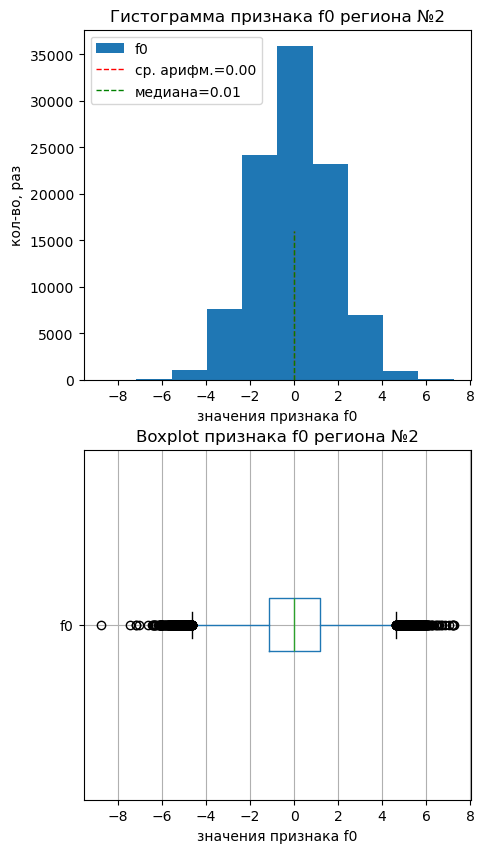

In [44]:
mean = geo_data_2['f0'].mean()
median = geo_data_2['f0'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_2['f0'].plot(kind='hist', title='Гистограмма признака f0 региона №2')
plt.plot([mean, mean], [0, 16000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 16000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f0')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_2.boxplot(column='f0', vert=False)
plt.title('Boxplot признака f0 региона №2')
plt.xlabel('значения признака f0')
plt.show()

**Центр набора данных признака f0 = 0**

#### Признак f1

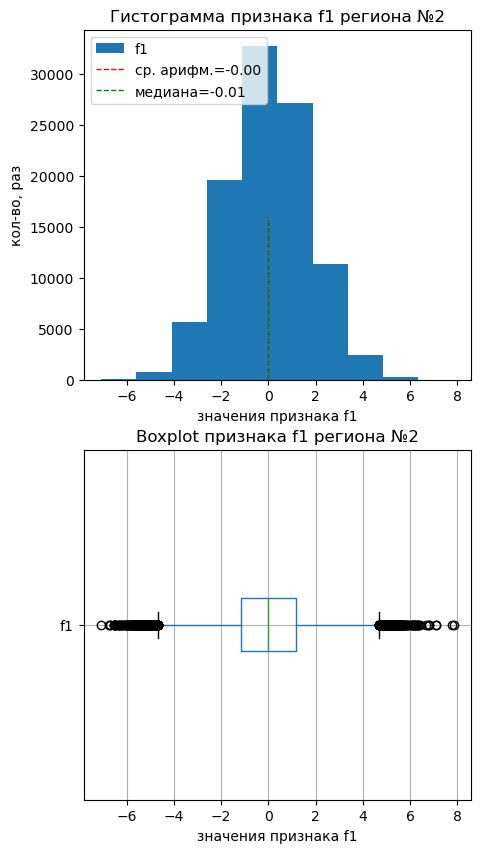

In [45]:
mean = geo_data_2['f1'].mean()
median = geo_data_2['f1'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_2['f1'].plot(kind='hist', title='Гистограмма признака f1 региона №2')
plt.plot([mean, mean], [0, 16000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 16000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f1')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_2.boxplot(column='f1', vert=False)
plt.title('Boxplot признака f1 региона №2')
plt.xlabel('значения признака f1')
plt.show()

**Центр набора данных признака f1 = 0**

#### Признак f2

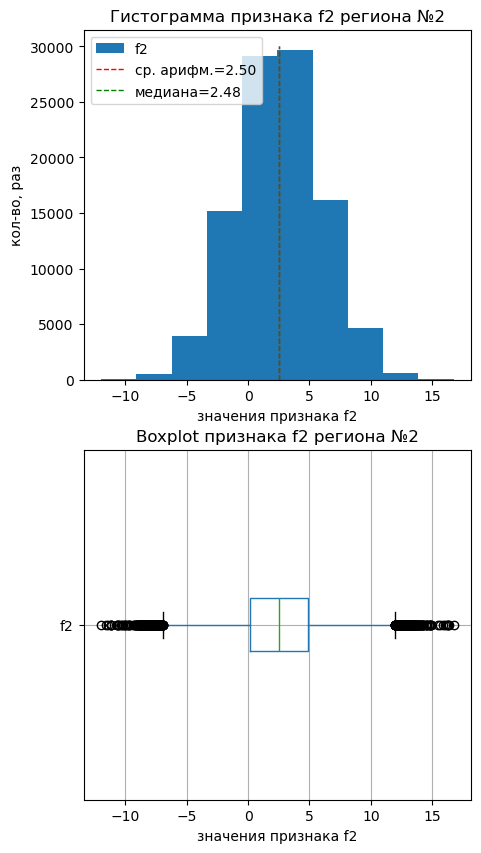

In [46]:
mean = geo_data_2['f2'].mean()
median = geo_data_2['f2'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_2['f2'].plot(kind='hist', title='Гистограмма признака f2 региона №2')
plt.plot([mean, mean], [0, 30000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 30000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака f2')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_2.boxplot(column='f2', vert=False)
plt.title('Boxplot признака f2 региона №2')
plt.xlabel('значения признака f2')
plt.show()

**Центр набора данных признака f2 = 2.5**

#### Признак product

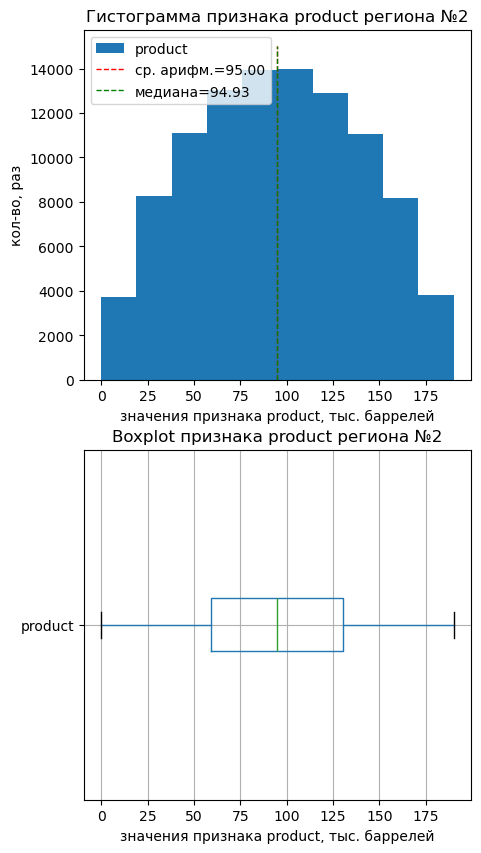

In [47]:
mean = geo_data_2['product'].mean()
median = geo_data_2['product'].median()

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
geo_data_2['product'].plot(kind='hist', title='Гистограмма признака product региона №2')
plt.plot([mean, mean], [0, 15000], color='red', linewidth=1, linestyle='--', label='ср. арифм.=' + f'{mean:.2f}')
plt.plot([median, median], [0, 15000], color='green', linewidth=1, linestyle='--', label='медиана=' + f'{median:.2f}')
plt.legend(loc='upper left')
plt.xlabel('значения признака product, тыс. баррелей')
plt.ylabel('кол-во, раз')

plt.subplot(2, 1, 2)
geo_data_2.boxplot(column='product', vert=False)
plt.title('Boxplot признака product региона №2')
plt.xlabel('значения признака product, тыс. баррелей')
plt.show()

**Центр набора данных признака product = 95**

#### Вывод

In [48]:
range_2_f0 = 1.5 * (geo_data_2.describe().loc['75%', 'f0'] - geo_data_2.describe().loc['25%', 'f0'])
range_2_f1 = 1.5 * (geo_data_2.describe().loc['75%', 'f1'] - geo_data_2.describe().loc['25%', 'f1'])
range_2_f2 = 1.5 * (geo_data_2.describe().loc['75%', 'f2'] - geo_data_2.describe().loc['25%', 'f2'])
range_2_product = 1.5 * (geo_data_2.describe().loc['75%', 'product'] - geo_data_2.describe().loc['25%', 'product'])

pd.DataFrame(
    [
        [
            geo_data_2.describe().loc['25%', 'f0'] - range_2_f0,
            0,
            geo_data_2.describe().loc['75%', 'f0'] + range_2_f0,
        ],
        [
            geo_data_2.describe().loc['25%', 'f1'] - range_2_f1,
            0,
            geo_data_2.describe().loc['75%', 'f1'] + range_2_f1,    
        ],
        [
            geo_data_2.describe().loc['25%', 'f2'] - range_2_f2,
            2.5,
            geo_data_2.describe().loc['75%', 'f2'] + range_2_f2,
        ],
        [
            geo_data_2['product'].min(),
            95,
            geo_data_2['product'].max(), 
        ]
    ],
    columns=['мин. знач., не явл. выбросом', 'центр набора данных', 'макс. знач., не явл. выбросом'],
    index=['f0', 'f1', 'f2', 'product']
)

,"мин. знач., не явл. выбросом",центр набора данных,"макс. знач., не явл. выбросом"
f0,-4.643524,0.0,4.639771
f1,-4.682566,0.0,4.671424
f2,-6.962294,2.5,11.951446
product,0.000000,95.0,190.029838


In [49]:
geo_data_2[
        geo_data_2['id'].isin(
            geo_data_2['id'].value_counts().head(4).index
        )
]

,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


Показатели дублирующихся данных не являются выбросами, поэтому нельзя сказать какие данные верные, а какие ошибочные, поэтому с учетом размера выборки (100000) проще эти данные удалить 

In [50]:
geo_data_2['id'].value_counts().head(4).index

Index(['VF7Jo', 'KUPhW', 'xCHr8', 'Vcm5J'], dtype='object', name='id')

In [51]:
geo_data_2 = geo_data_2.drop(
    geo_data_2[
        geo_data_2['id'].isin(
            geo_data_2['id'].value_counts().head(4).index
        )
    ].index
)

In [52]:
geo_data_2.shape

(99992, 5)

In [53]:
len(geo_data_2['id'].unique())

99992

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Исследование дублей - хорошо, принято. Тут ожно ещё по гистограмме делать выводы о типе распределения данных : нормльное / ненормальное.</p>
</div>

## Подготовка данных

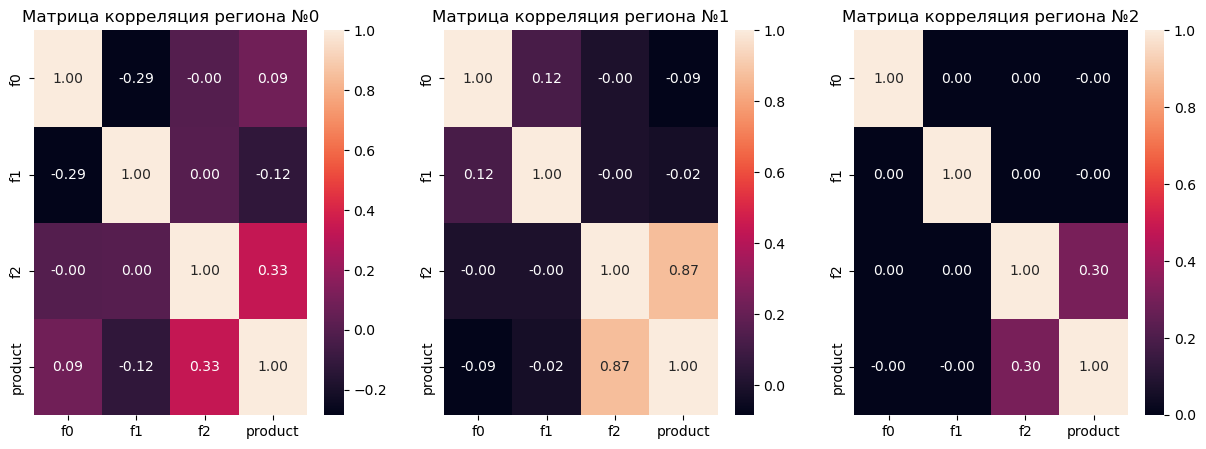

In [54]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(geo_data_0.drop(['id'], axis=1).corr(method='kendall'), annot=True, fmt='.2f')
plt.title('Матрица корреляция региона №0')

plt.subplot(1, 3, 2)
sns.heatmap(geo_data_1.drop(['id'], axis=1).corr(method='kendall'), annot=True, fmt='.2f')
plt.title('Матрица корреляция региона №1')

plt.subplot(1, 3, 3)
sns.heatmap(geo_data_2.drop(['id'], axis=1).corr(method='kendall'), annot=True, fmt='.2f')
plt.title('Матрица корреляция региона №2')

plt.show()

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Есть графический анализ, отлично!!!! ЗАМЕЧУ один важный момент по корреляционному аализу. Функция corr() по умолчанию использует метод Пирсона. НО он исключетельно к нормально распределённым данным подходит. У нас же данные ( и графический анализ у тебя это и покажет, выше как раз об этом написал.) ненормально распределны. Значет нужен иной метод корреляционного анализа. А именно метод Спирмена или Кендала. Посмотри этот момент ещё раз!!

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА</b></u></p>
    <p>Исправил (но ничего не поменялось), т.е. Пирсон считает линейную только для нормально распределенных данных, а остальные считают тоже ЛИНЕЙНУЮ, но только для ненормального?</p>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 2</b><br>👍 да, линейную регрессию, только для ненормальных, верно.

Согласно шкале Чеддока очень сильная линейная связь между product и f2 региона №1, что положительно скажется на качестве модели

In [55]:
num_columns = ['f0', 'f1', 'f2']

In [56]:
data_preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [57]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

### Регион №0

In [58]:
geo_data_0.head(1)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062


In [59]:
X_train_geo_0, X_valid_geo_0, y_train_geo_0, y_valid_geo_0 = train_test_split(
    geo_data_0.drop(['id', 'product'], axis=1),
    geo_data_0['product'],
    random_state = RANDOM_STATE)

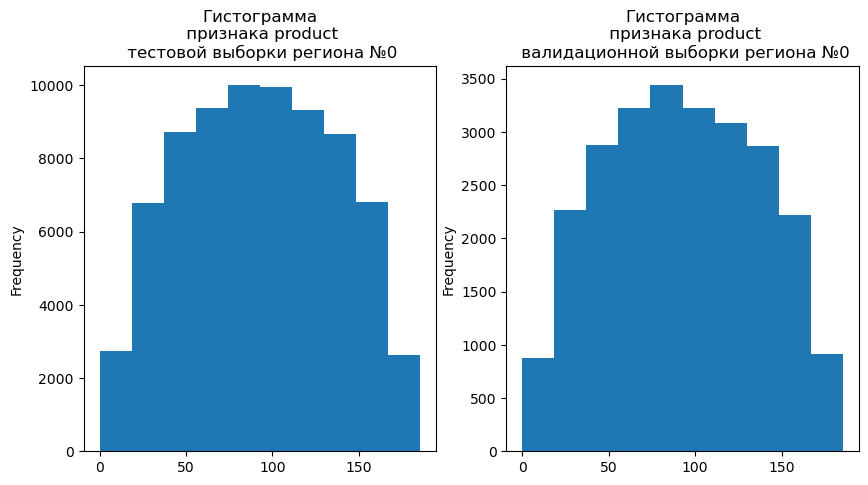

In [60]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_train_geo_0.plot(kind='hist', title='Гистограмма\n признака product\n тестовой выборки региона №0')

plt.subplot(1, 2, 2)
y_valid_geo_0.plot(kind='hist', title='Гистограмма\n признака product\n валидационной выборки региона №0')

plt.show()

Видно, что форма гистограмм одинакова. **Вопрос: а как Питон умудряется это делать?**

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Про что именно вопрос: одинаковы гистограммы для выборок трайна и теста? Т.е. как работает train_test_split?

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА</b></u></p>
    <p>Да, как он умудрился разбить данные из product сохранив распределение?</p>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 2</b><br>можно под капот train_test_split залезть) Но там идея такая, что случайным образом разбивается выборка. И эта слусчайность обеспечивает на второй выборке такоее же распределение, как на исходной. 

In [61]:
pipe_final.fit(X_train_geo_0, y_train_geo_0) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])

In [62]:
y_pred_geo_0 = pipe_final.predict(X_valid_geo_0)
y_pred_geo_0 = pd.Series(y_pred_geo_0, index=X_valid_geo_0.index)

In [63]:
mean_pred_geo_0 = y_pred_geo_0.mean()

In [64]:
print(f'Cредний запас предсказанного сырья для региона №0: {mean_pred_geo_0:.2f} тыс. баррелей')

Cредний запас предсказанного сырья для региона №0: 92.29 тыс. баррелей


In [65]:
RMSE_geo_0 = mean_squared_error(y_valid_geo_0, y_pred_geo_0, squared=False)

C:\Users\Marat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [66]:
print(f'RMSE предсказанного сырья для региона №0: {RMSE_geo_0:.2f} тыс. баррелей')

RMSE предсказанного сырья для региона №0: 37.76 тыс. баррелей


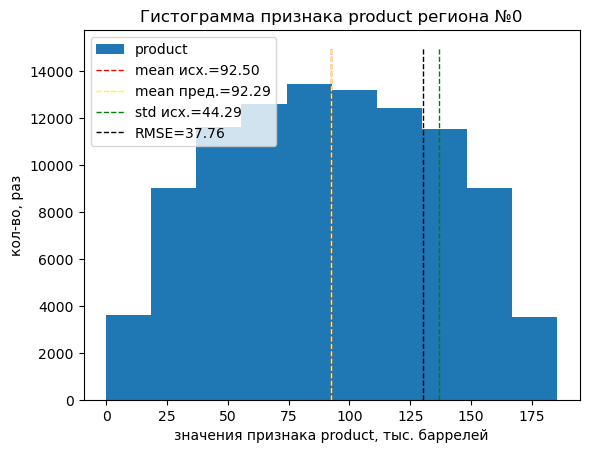

In [67]:
mean = geo_data_0['product'].mean()
std = geo_data_0['product'].std()

geo_data_0['product'].plot(kind='hist', title='Гистограмма признака product региона №0')
plt.plot([mean, mean], [0, 15000], color='red', linewidth=1, linestyle='--', label='mean исх.=' + f'{mean:.2f}')
plt.plot([mean_pred_geo_0, mean_pred_geo_0], [0, 15000], color='yellow', linewidth=1, linestyle='--', label='mean пред.=' + f'{mean_pred_geo_0:.2f}')
plt.plot([mean + std, mean + std], [0, 15000], color='green', linewidth=1, linestyle='--', label='std исх.=' + f'{std:.2f}')
plt.plot([mean_pred_geo_0 + RMSE_geo_0, mean_pred_geo_0 + RMSE_geo_0], [0, 15000], color='black', linewidth=1, linestyle='--', label='RMSE=' + f'{RMSE_geo_0:.2f}')
plt.xlabel('значения признака product, тыс. баррелей')
plt.ylabel('кол-во, раз')
plt.legend()
plt.show()

#### Вывод

Средняя ошибка предсказания находится в пределах стандартного отклонения, что положительно характеризует модель

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Не пошло в тренажёре(

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА</b></u></p>
    <p>Заменил функцию расчета RMSE</p>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 2</b><br>👍

### Регион №1

In [68]:
geo_data_1.head(1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276,-0.005876,3.179103


In [69]:
X_train_geo_1, X_valid_geo_1, y_train_geo_1, y_valid_geo_1 = train_test_split(
    geo_data_1.drop(['id', 'product'], axis=1),
    geo_data_1['product'],
    random_state = RANDOM_STATE)

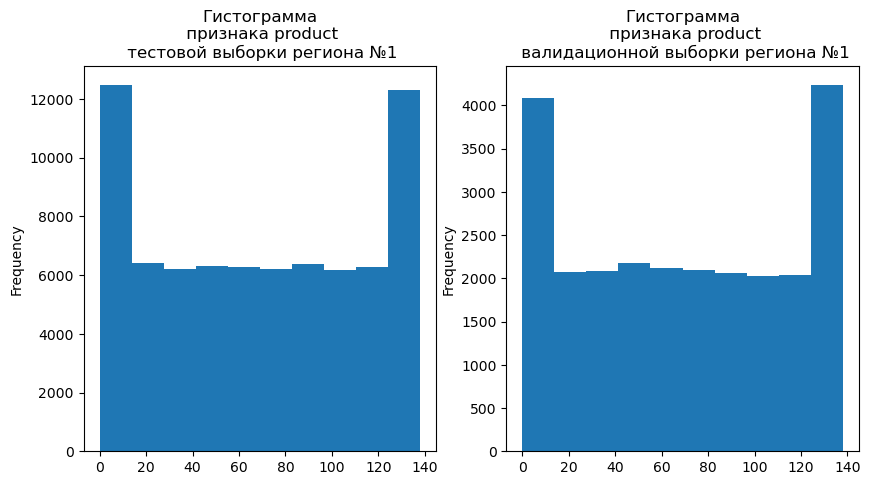

In [70]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_train_geo_1.plot(kind='hist', title='Гистограмма\n признака product\n тестовой выборки региона №1')

plt.subplot(1, 2, 2)
y_valid_geo_1.plot(kind='hist', title='Гистограмма\n признака product\n валидационной выборки региона №1')

plt.show()

Видно, что форма гистограмм одинакова. **Вопрос: а как Питон умудряется это делать?**

In [71]:
pipe_final.fit(X_train_geo_1, y_train_geo_1) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])

In [72]:
y_pred_geo_1 = pipe_final.predict(X_valid_geo_1)
y_pred_geo_1 = pd.Series(y_pred_geo_1, index=X_valid_geo_1.index)

In [73]:
mean_pred_geo_1 = y_pred_geo_1.mean()

In [74]:
print(f'Cредний запас предсказанного сырья для региона №1: {mean_pred_geo_1:.2f} тыс. баррелей')

Cредний запас предсказанного сырья для региона №1: 69.17 тыс. баррелей


In [75]:
RMSE_geo_1 = mean_squared_error(y_valid_geo_1, y_pred_geo_1, squared=False)

C:\Users\Marat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [76]:
print(f'RMSE предсказанного сырья для региона №1: {RMSE_geo_1:.2f} тыс. баррелей')

RMSE предсказанного сырья для региона №1: 0.89 тыс. баррелей


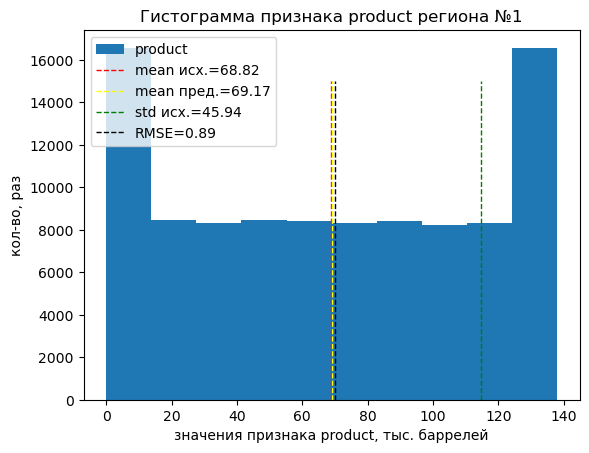

In [77]:
mean = geo_data_1['product'].mean()
std = geo_data_1['product'].std()

geo_data_1['product'].plot(kind='hist', title='Гистограмма признака product региона №1')
plt.plot([mean, mean], [0, 15000], color='red', linewidth=1, linestyle='--', label='mean исх.=' + f'{mean:.2f}')
plt.plot([mean_pred_geo_1, mean_pred_geo_1], [0, 15000], color='yellow', linewidth=1, linestyle='--', label='mean пред.=' + f'{mean_pred_geo_1:.2f}')
plt.plot([mean + std, mean + std], [0, 15000], color='green', linewidth=1, linestyle='--', label='std исх.=' + f'{std:.2f}')
plt.plot([mean_pred_geo_1 + RMSE_geo_1, mean_pred_geo_1 + RMSE_geo_1], [0, 15000], color='black', linewidth=1, linestyle='--', label='RMSE=' + f'{RMSE_geo_1:.2f}')
plt.xlabel('значения признака product, тыс. баррелей')
plt.ylabel('кол-во, раз')
plt.legend()
plt.show()

#### Вывод

На гистограмме исходной выборки есть два пика, которые увеличили std. RMSE для данной модели мало, это связано с тем, что для второго региона линейная зависимость между признаками и целевым признаком сильнее

### Регион №2

In [78]:
geo_data_2.head(1)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673


In [79]:
X_train_geo_2, X_valid_geo_2, y_train_geo_2, y_valid_geo_2 = train_test_split(
    geo_data_2.drop(['id', 'product'], axis=1),
    geo_data_2['product'],
    random_state = RANDOM_STATE)

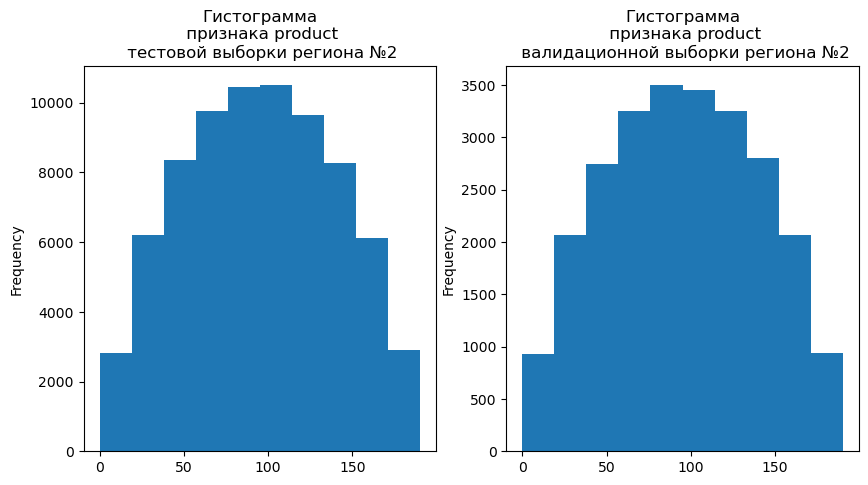

In [80]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_train_geo_2.plot(kind='hist', title='Гистограмма\n признака product\n тестовой выборки региона №2')

plt.subplot(1, 2, 2)
y_valid_geo_2.plot(kind='hist', title='Гистограмма\n признака product\n валидационной выборки региона №2')

plt.show()

Видно, что форма гистограмм одинакова. **Вопрос: а как Питон умудряется это делать?**

In [81]:
pipe_final.fit(X_train_geo_2, y_train_geo_2) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])

In [82]:
y_pred_geo_2 = pipe_final.predict(X_valid_geo_2)
y_pred_geo_2 = pd.Series(y_pred_geo_2, index=X_valid_geo_2.index)

In [83]:
mean_pred_geo_2 = y_pred_geo_2.mean()

In [84]:
print(f'Cредний запас предсказанного сырья для региона №2: {mean_pred_geo_2:.2f} тыс. баррелей')

Cредний запас предсказанного сырья для региона №2: 94.82 тыс. баррелей


In [85]:
RMSE_geo_2 = mean_squared_error(y_valid_geo_2, y_pred_geo_2, squared=False)

C:\Users\Marat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
print(f'RMSE предсказанного сырья для региона №2: {RMSE_geo_2:.2f} тыс. баррелей')

RMSE предсказанного сырья для региона №2: 40.13 тыс. баррелей


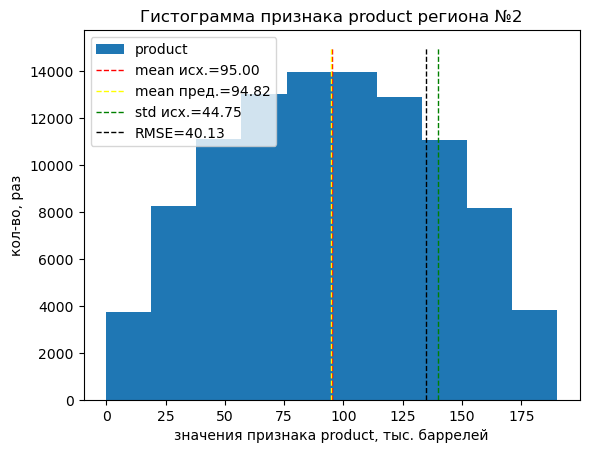

In [87]:
mean = geo_data_2['product'].mean()
std = geo_data_2['product'].std()

geo_data_2['product'].plot(kind='hist', title='Гистограмма признака product региона №2')
plt.plot([mean, mean], [0, 15000], color='red', linewidth=1, linestyle='--', label='mean исх.=' + f'{mean:.2f}')
plt.plot([mean_pred_geo_2, mean_pred_geo_2], [0, 15000], color='yellow', linewidth=1, linestyle='--', label='mean пред.=' + f'{mean_pred_geo_2:.2f}')
plt.plot([mean + std, mean + std], [0, 15000], color='green', linewidth=1, linestyle='--', label='std исх.=' + f'{std:.2f}')
plt.plot([mean_pred_geo_2 + RMSE_geo_2, mean_pred_geo_2 + RMSE_geo_2], [0, 15000], color='black', linewidth=1, linestyle='--', label='RMSE=' + f'{RMSE_geo_2:.2f}')
plt.xlabel('значения признака product, тыс. баррелей')
plt.ylabel('кол-во, раз')
plt.legend()
plt.show()

#### Вывод

Средняя ошибка предсказания находится в пределах стандартного отклонения, что положительно характеризует модель

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Код прогнать не смог( Что-то с библиотеками, видимо. Порсомтри, пожалуйста. Соответственно, результат расчётов, пока не смог увидет, а в выводах их нет( Так-то кажется, что всё верно. А по твоим вопросам - не совсем их "поймал", написал в ответку под перым вопросом.

## Расчет прибыли

Бюджет на разработку скважин в регионе - 10 млрд рублей.<br>
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

Таким образом, объём запасов в скважине должен составлять:

In [88]:
product_need = 10 ** 10 / 200 / 450 / 1000
product_need

111.11111111111111

тыс. баррелей, чтобы выйти в ноль

**Средний объём  запаса сырья в регионе №0**

In [89]:
geo_0_product_mean = geo_data_0['product'].mean()
geo_0_product_mean

92.49916597893444

**Средний объём  запаса сырья в регионе №1**

In [90]:
geo_1_product_mean = geo_data_1['product'].mean()
geo_1_product_mean

68.82414772665173

**Средний объём  запаса сырья в регионе №2**

In [91]:
geo_2_product_mean = geo_data_2['product'].mean()
geo_2_product_mean

94.99876686768079

### Вывод

Средние объемы запасов сырья в регионах ниже, чем необходимый объем на скважину для преодоления точки безубыточности

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>солидарен с результатом и выводом.

## Расчёт прибыли по выбранным скважинам и предсказаниям модели

Определим функцию расчета прибыли. Функция возвращает значение прибыли в тыс. руб.

In [92]:
def profit(product):
    product = pd.Series(product).sort_values(ascending=False)[0:BEST]
    profit = sum(product) * PROFIT - BUDGET
    return profit

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>В этом проекте нам надо все константы объявлять глобально и использовать обозначения)

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА</b></u></p>
    <p>Исправил</p>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 2</b><br>👍

### Регион №0

In [93]:
geo_0_profit = profit(y_pred_geo_0)
geo_0_profit

3892002.224972453

### Регион №1

In [94]:
geo_1_profit = profit(y_pred_geo_1)
geo_1_profit

2491627.0167050716

### Регион №2

In [95]:
geo_2_profit = profit(y_pred_geo_2)
geo_2_profit

3377618.993217768

## Расчет рисков и прибыли для каждого региона

In [96]:
#def profit_for_bootstrap(product_t, product_p):
#    index_p = product_p.sort_values(ascending=False).index[0:BEST]
#    product_t = product_t.loc[index_p]
#    profit = sum(product_t) * PROFIT - BUDGET
#    return profit

In [97]:
def profit_for_bootstrap(product_t, product_p):
    index_p = product_p.sort_values(ascending=False).index
    product_t = product_t.loc[index_p][0:BEST]
    profit = sum(product_t) * PROFIT - BUDGET
    return profit

In [98]:
state = np.random.RandomState(12345)

In [99]:
def bootstrap(geo_data, pipe_final):
    X_train_geo, X_valid_geo, y_train_geo, y_valid_geo = train_test_split(
        geo_data.drop(['id', 'product'], axis=1),
        geo_data['product'],
        random_state = RANDOM_STATE)

    pipe_final.fit(X_train_geo, y_train_geo)
    y_pred_geo = pipe_final.predict(X_valid_geo)

    target = y_valid_geo
    pred = pd.Series(y_pred_geo, index=X_valid_geo.index)

    values = []
    for i in range(N):
        index_t = target.sample(n=N_ITEMS, replace=True, random_state=state).index
        values.append(profit_for_bootstrap(target.loc[index_t], pred.loc[index_t]))
      
    values = pd.Series(values)
    risk = ((values < 0).mean() * 100, '%')
    print('Риск убытков = ', risk)

    return values

### Регион №0

In [100]:
values = bootstrap(geo_data_0, pipe_final)

Риск убытков =  (6.6000000000000005, '%')


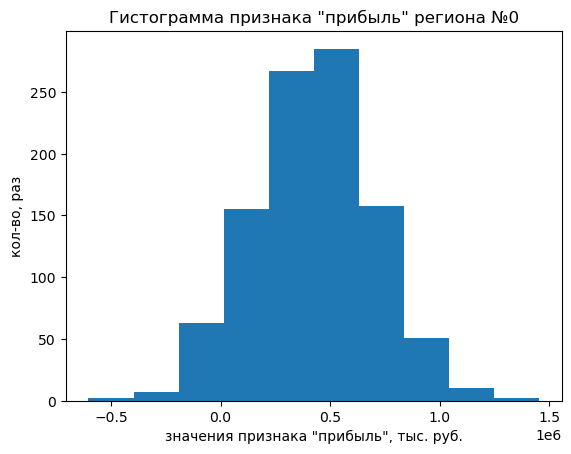

In [101]:
values.plot(kind='hist', title='Гистограмма признака "прибыль" региона №0')
plt.xlabel('значения признака "прибыль", тыс. руб.')
plt.ylabel('кол-во, раз')
plt.show()

In [102]:
print(f'Средняя прибыль {values.mean():.0f} тыс. руб.')

Средняя прибыль 424644 тыс. руб.


**Доверительный интервал**

In [103]:
lower = values.quantile(0.025)
lower

-129560.49767834846

In [104]:
upper = values.quantile(0.975)
upper

999548.628946321

**Риск убытков имеется**

### Регион №1

In [105]:
values = bootstrap(geo_data_1, pipe_final)

Риск убытков =  (0.6, '%')


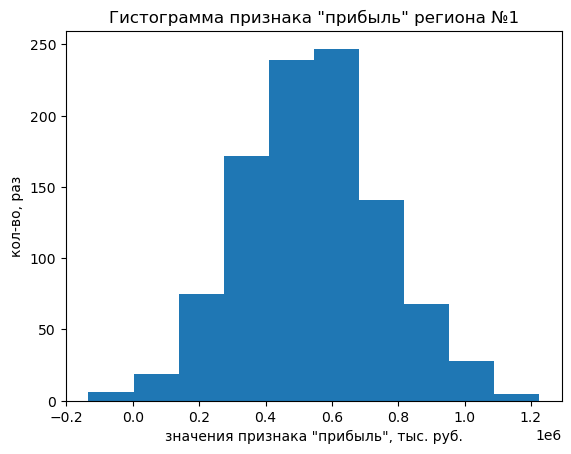

In [106]:
values.plot(kind='hist', title='Гистограмма признака "прибыль" региона №1')
plt.xlabel('значения признака "прибыль", тыс. руб.')
plt.ylabel('кол-во, раз')
plt.show()

In [107]:
print(f'Средняя прибыль {values.mean():.0f} тыс. руб.')

Средняя прибыль 541661 тыс. руб.


**Доверительный интервал**

In [108]:
lower = values.quantile(0.025)
lower

139477.81097456344

In [109]:
upper = values.quantile(0.975)
upper

979967.0513724369

**Риск убытков отсутствует**

### Регион №2

In [110]:
values = bootstrap(geo_data_2, pipe_final)

Риск убытков =  (9.0, '%')


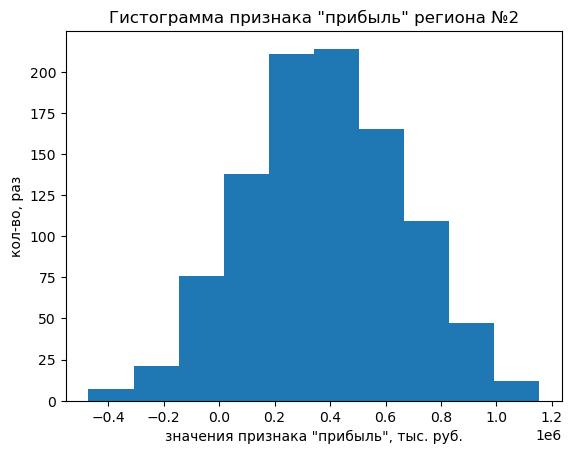

In [111]:
values.plot(kind='hist', title='Гистограмма признака "прибыль" региона №2')
plt.xlabel('значения признака "прибыль", тыс. руб.')
plt.ylabel('кол-во, раз')
plt.show()

In [112]:
print(f'Средняя прибыль {values.mean():.0f} тыс. руб.')

Средняя прибыль 379368 тыс. руб.


**Доверительный интервал**

In [113]:
lower = values.quantile(0.025)
lower

-165918.2253237802

In [114]:
upper = values.quantile(0.975)
upper

928506.2003883236

**Риск убытков имеется**

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
</font><br>
А вот тут не совсем верно с расчётами прибыли и бутсрепа Ниже напишу какой алгоритм ожидается. <br><br>
Рекомендуют такой алгоритм прибыли:<br>
На вход функция получает таргет и предсказанные.<br>
1) сортируем предсказанные значения.<br>
2) отбираем таргет по индексу предикта, отбраем 200 лучших именно по таргету<br>
3) дальше счёт прибыли по формуле...
<br><br>Функцию бутсрепа рекомендуют по такому алгоритму создавать:<br>
1) отбираем случайным (Sample) образом 500 таргет значений (ОК)<br>
2) отираем предсказанные значения по таргет_индексу <br>
3) отсылаем в функцию прибыли таргет и предикт. <br>
4) дальше расчёт среднего, доверительных интервалов и рисков<br>

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА</b></u></p>
    <p>А почему вообще так делают с прибылью? 1) почему мы соритруем предикты? 2) почему потом берем уже таргеты? 3) допустим я приехал в чисто поле и сделал замер 500 точек, а дальше что? я вообще не понимаю, что это будет работать в реальной жизни?</p>
</div>

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА</b></u></p>
    <p>А зачем нужен вообще бутстреп в данном случе, если данных 10000 на регион. Почему нельзя просто обучить модель и делать предсказания. И вообще зачем бустреп, если в реалности никогда не будет 10000 точек, т.е. если у меня уже есть результаты по 10000 точкам, то зачем мне вообще предсказания? Например, решил я поехать в регион новый, сдеалал исслования 500 точек, а дальше что? И правильно ли я понимаю, что надо брать 500 точек именно из валидационных данных?</p>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 2</b><br>
Попробую, как смогу ответить на вопросы (хотя, наверное у наставника или преподв это вышло бы лучше)<br>
<font color='blue'>
Зачем нужен бутстреп, ведь мы можем предсказать по всему валидному набору, отобрать лучших 200 и все на этом....
<br /><br /><font color='green'>Можно сказать, что весь проект посвящён теме бутстрепа) Ты предположил, что можно взять один раз лучшие предсказы и по их таргетаом посчитать, и всё. А если наша предсказ - ошибочный? (т.е. совершенно бытовая ситуация - можно ли по одному опыту делать вывод? Например, мы один раз разбили кружку, можно ли по одному случаю утверждать, что мы суперспециалисты по разбиванию кружек? скорее всего нам надо, как минимум, знать а сколько раз мы брали кружку... предпоожим выясняется, что брали её 1000 раз с самой верхней полки и только раз разбили... - не такие уж мы и специалисты по разбиванияю....это один вывод. и т.д.)<br>
    
ВОт и здесь об этом же: ведь может так случиться, что модель предсказала не совсем верно. Тогда, сделав вывод только по одному замеру 200-от скважин, мы сделаем и ложные управленческие выводы. И тогда вопрос: а как подстраховаться от ложных выводов? И тогда на сцену выходит бутсреп (это что-то вроде моделирования ситуаций на подобие методов монте-карло). Идея бутсрепа такая: взглянем 1000 раз (вместо одно раза) на среднюю из 200-от скважин добычу. Т.е. посчитаем среднее средних.. И уже по нему будем делать вывод. Именно такой подход снизит вероятность сделать ошибочный вывод.<br><br>
    
Вообще, методы модеирования (симуляции) ситуаций - распространённый способ управленческого прогнозирования. <br><br>
    
И так: благгодаря бутсрепу, у нас есть 1000 измерений среднего по разным 200-ам скважинам, а значит есть и дисперсия/стандартное отклонение (как ты и написал). А это позволяет нам найти доверителный интервал ПРОГНОЗА. (формула, которую ты оставил - расчитывает интервал, в котором находится наше истинное среднее. Ниже оставлю ещё формулы) И всё верно, нижняя граница может выходить в минус. Ведь от среднего откладывается  три стандарнтых отклонения вниз  (по сути). Когда такое приключается, то нижнюю границу просто обнуляют. А те скважины, по которым середнее < 0 - убыточные. И их количество (процент счиаем) и есть риск. Т.е. и ДИ и риски мы счиаем уже по бутсреповским средним.<br>
    
Причём здесь 500? это придаёт ещё больше СЛУЧАЙНОСТИ в самом методе управленческого моделирования ситуаций. Просто берём ковшом 500 шариков, из них отбираем тоько 200 лучших, считаем всё, что нужно считать, а потом возвращаем шарики назад. И так 1000 раз.<br><br>
    
Зачем отбирать по  предсказам, а прибыль считать по таргетам? У нас же задача определиться с наиболее прибыльным регионом. А не ппредсказать добычу скважины. И тут так: по тестовым данным считаем прибыль, предполагая, что она и будет в будущем по всему региону. Это точнее, чем по брать прибыль по рпедсказам<br>
    
УДалось ли мне помочь как-то подразобраться с этой темкой? есть ли ещё вопросы? Повторюсь, цель её не просто построить прогноз по модели. А научиться выбирать лучшее управленческое решение на основе метода моделирования ситуации.<br>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 2</b><br>
Доброго дня, Марат! Точно не простая тема. Постарался ответить на твои вопросы. А по коды - всё ещё не верно( Ниже ещё раз оставлбю алгоритм. Посмотри, пожалуйста. БУДУ ЖДАТЬ!

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА №2</b></u></p>
    <p>Исправил, но вопросов стало еще больше</p>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 3</b><br>А какие вопросы остались?<br>
ПО корректировкам:<br>
Осталось чуть-чуть:<br>
1) Константы в этом проекте надо использовать объявленные глобально, не числа. ( в примере оставил тольео потому, чтобы алгоритм был яснее)<br>
2) Надо вывести риск в виде числа в процентах. Должна быть количественная характеристика, присуща рискам.<br>
3) В функции прибыли посмотри, пожалуйста,  там 20 отбирается не совсем верно. В алгоритме ниже они по таргету отбираются. Тогда результат будет чуть иным)<br>
БУДУ ЖДАТЬ!

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА №2</b></u></p>
    <p>1) добавил 2) согласно вашему примеру вы считаете риск как среднее по отрицательным числам, а потом просто умножаете на процент. А разве так считать можно? Надо ведь считать площадь под гистограммой, где прибыль меньше 0. 3) Я тоже беру по таргету, алгоритм изменил, но особой разницы нет</p>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 4</b><br>Привет, Марат! Функция прибыли иначе, тогда изменится результат. Там 200 отбрирать по таргету! Посмотри выше, пожалуйста. По поводу рисков: да, можно считать площадь под кривой. А вот в этой строке print('Риск убытков = ', risk * 1000, ' в млн. руб.') надо считать процен. У нас и позаданию - сравнивать с 2,5%) И на этом основании - сделать выод. Этот процент не стоит подписывать млн.руб.<br> БУДУ ЖДАТЬ!

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА №4</b></u></p>
    <p>1) про прибыль дошло. Там же будут True и False, т.е. в итоге мы получим кол-во единиц среди единиц и нулей. Исправил</p>
    <p>2) Ячейка 97. Полная копия вашего решения, а результат тот же</p>
</div>

<div class="alert alert-info" style="border-color: garkred; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ СТУДЕНТА №3</b></u></p>
    <p>1) код функции поменял, но я не понимаю в чем разница между моим кодом и вашим. Я сортрирую, потом беру первые 200 индексов и по ним беру таргет, а у вас берутся все отсортированные индексы, а потом только 200 по таргету. Разницы нет 2) тут тоже сделала как у вас. А как можно взять среднее, умножить на 100 и считать, что получились проценты?</p>
</div>

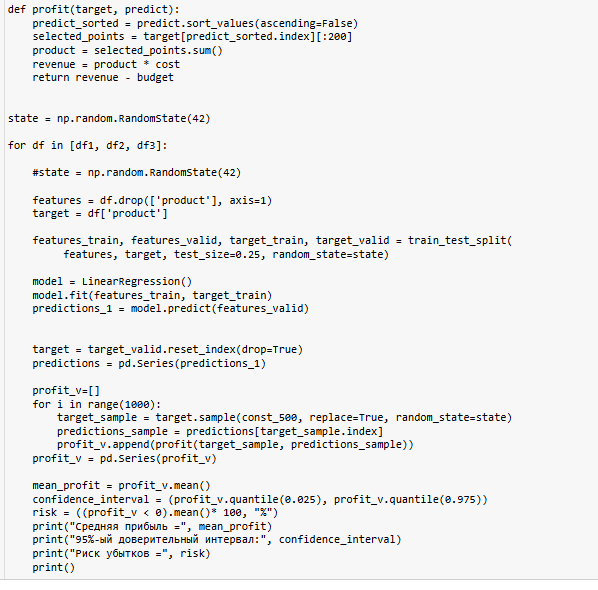

### Вывод

С учетом того, что регион №1 малорискован, то для разработки лучше выбрать регион №1

## Вывод

Разработке подлежит регион №1

**Вопросы:**
- какие данные брать для bootstrap?
- правильно ли я засунул 500 в bootstrap?
- как в реальности применить bootstrap. Допустим я поехал в регоин и получил 500 измерений. А как тут применить bootstrap?

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ РЕВЬЮЕРА 2</b><br>Выше отвечал на вопросы)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Марат, интересная работа!<br>
Оформление, удобный для просмотра код, автоматизация расчётов - многое удалось как надо<br>
Итоги в конце - понятные и чёткие. Хорошо, что доверительные интервалы взяты те, которые нужны, ОК.<br>
      
Данный проект не простой, может показаться. Потому что, его цель не просто построить прогноз по модели или прогноз продаж. А научиться выбирать лучшее управленческое решение на основе метода моделирования ситуации. В этом ключе и есть смысл её рассматривать. (Кстати, одна из программ на рынке по этой теме - AnyLogic - интересный продукт. Мне приходилось как-то смотреть её.. интересно. Можешь ролик из инета глянуть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования может по-другому лечь... Ведь бутсреп - как раз один из способов моделирования)<b   

<font color='red'>    
А по проекту: есть несколько моментов, которые надо бы проверить. Выделил их цветом и постарался аргументировать. Посмотри, пожалуйста. Также, в этом проекте важно для одинаковых расчётов делать автоматизаци.: функции или в цикле перебирать расчёт регионов. <br>
<br>
<font color='green'>    
БУДУ ЖДАТЬ)
<br>
</font>